<a href="https://colab.research.google.com/github/wakamezake/ImageDataAugmentor/blob/features%2Fsample/samples/use_imgaug_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install imgaug

In [0]:
!git clone https://github.com/wakamezake/ImageDataAugmentor.git

Cloning into 'ImageDataAugmentor'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (227/227), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 392 (delta 124), reused 145 (delta 67), pack-reused 165
Receiving objects: 100% (392/392), 356.00 KiB | 7.91 MiB/s, done.
Resolving deltas: 100% (223/223), done.


In [0]:
%cd ImageDataAugmentor/
!python setup.py install

/content/ImageDataAugmentor
running install
running bdist_egg
running egg_info
creating ImageDataAugmentor.egg-info
writing ImageDataAugmentor.egg-info/PKG-INFO
writing dependency_links to ImageDataAugmentor.egg-info/dependency_links.txt
writing requirements to ImageDataAugmentor.egg-info/requires.txt
writing top-level names to ImageDataAugmentor.egg-info/top_level.txt
writing manifest file 'ImageDataAugmentor.egg-info/SOURCES.txt'
writing manifest file 'ImageDataAugmentor.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying ImageDataAugmentor.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying ImageDataAugmentor.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying ImageDataAugmentor.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying ImageDat

In [0]:
from ida.image_data_augmentor import ImageDataAugmentor
from imgaug import augmenters as iaa
import imgaug as ia

sometimes = lambda aug: iaa.Sometimes(0.5, aug)
AUGMENTATIONS = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontally flip 50% of all images
    iaa.Flipud(0.2), # vertically flip 20% of all images
    sometimes(iaa.Affine(
        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)}, # scale images to 90-110% of their size, individually per axis
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)}, # translate by -10 to +10 percent (per axis)
        rotate=(-45, 45), # rotate by -45 to +45 degrees
        shear=(-5, 5), # shear by -5 to +5 degrees
        mode=ia.ALL # use any of scikit-image's warping modes
    )
    )],
    random_order=True) 

In [0]:
datagen = ImageDataAugmentor(
        rescale=1./255,
        augment=AUGMENTATIONS,
        preprocess_input=None)

In [0]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 3s 0us/step


In [0]:
datagen.fit(x_train)

In [0]:
for images in datagen.flow(x_train, batch_size=64):
    break

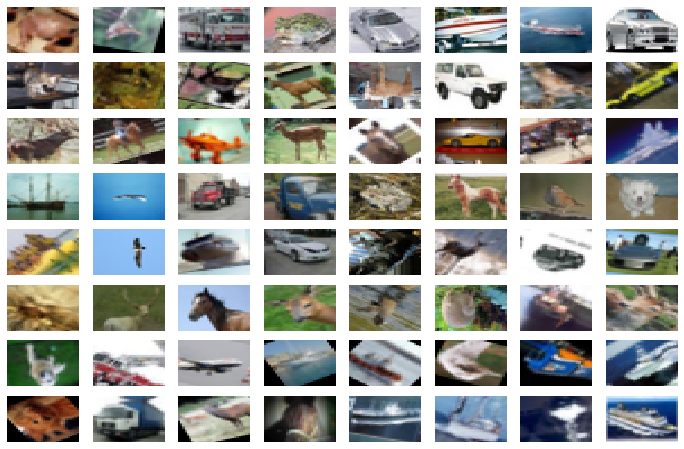

In [0]:
fig = plt.figure(figsize=(12, 8))
for i in range(images.shape[0]):
    ax = plt.subplot(8,8,i+1)
    ax.imshow(images[i], aspect='auto')
    ax.axis("off")
plt.show()